In [59]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [60]:
import scipy as sp
import sklearn as sk
import seaborn as sns

In [61]:
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV


In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
!pwd

/content


In [8]:
!ls

players.csv  sample_data


In [9]:
path="/content/players.csv"

In [10]:
Data=pd.read_csv(path)

In [11]:
Data.head(20)

,id,name,now_cost,position,team,web_name,transfers_in_event,influence_rank_type,news_added,ict_index_rank_type,...,now_cost_rank_type,ict_index,now_cost_rank,minutes,yellow_cards,cost_change_event_fall,red_cards,value_form,ict_index_rank,total_points
0,1,Folarin Balogun,44,FWD,Arsenal,Balogun,0,61,2023-08-31T08:55:15.272751Z,63,...,94,0.0,528,0,0,0,0,0.0,628,0
1,2,Cédric Alves Soares,39,DEF,Arsenal,Cédric,433,173,NaN,172,...,231,0.0,729,0,0,0,0,0.0,493,0
2,3,Mohamed Elneny,44,MID,Arsenal,M.Elneny,54,215,2023-12-12T22:30:08.433665Z,214,...,290,0.4,498,1,0,0,0,0.0,470,4
3,4,Fábio Ferreira Vieira,54,MID,Arsenal,Fábio Vieira,5,134,2023-12-07T12:00:08.489004Z,139,...,80,21.9,127,236,0,0,1,0.0,300,21
4,5,Gabriel dos Santos Magalhães,49,DEF,Arsenal,Gabriel,104278,42,2023-09-30T23:00:07.672676Z,47,...,31,43.3,247,1284,1,0,0,0.9,172,56
5,6,Kai Havertz,71,MID,Arsenal,Havertz,1812,65,2023-12-23T20:00:08.458889Z,53,...,18,70.3,30,1092,5,0,0,0.6,77,50
6,8,Gabriel Fernando de Jesus,80,FWD,Arsenal,G.Jesus,45531,18,2023-10-24T23:30:07.618920Z,10,...,4,83.3,12,821,3,0,0,0.6,48,46
7,9,Jorge Luiz Frello Filho,53,MID,Arsenal,Jorginho,74,157,2023-12-18T00:00:09.353001Z,161,...,83,12.4,134,383,1,0,0,0.1,359,15
8,10,Jakub Kiwior,43,DEF,Arsenal,Kiwior,54,141,NaN,142,...,151,7.4,603,247,0,0,0,0.1,398,12
9,11,Marcus Oliveira Alencar,45,MID,Arsenal,Marquinhos,0,267,2023-08-14T03:57:12.475590Z,270,...,246,0.0,424,0,0,0,0,0.0,678,0


In [12]:
Data.shape

(769, 79)

In [13]:
Data.keys()


Index(['id', 'name', 'now_cost', 'position', 'team', 'web_name',
       'transfers_in_event', 'influence_rank_type', 'news_added',
       'ict_index_rank_type', 'assists', 'selected_rank',
       'direct_freekicks_order', 'starts_per_90', 'goals_conceded',
       'threat_rank_type', 'status', 'ep_this', 'news', 'selected_rank_type',
       'goals_scored', 'influence_rank', 'goals_conceded_per_90',
       'selected_by_percent', 'in_dreamteam', 'points_per_game_rank',
       'expected_goal_involvements_per_90', 'influence', 'form_rank_type',
       'expected_goals_conceded_per_90', 'chance_of_playing_this_round',
       'ep_next', 'expected_assists', 'expected_goals_conceded',
       'points_per_game', 'cost_change_start', 'transfers_in', 'starts',
       'cost_change_start_fall', 'creativity', 'saves_per_90', 'threat_rank',
       'penalties_saved', 'points_per_game_rank_type', 'own_goals', 'bonus',
       'penalties_missed', 'expected_goals', 'chance_of_playing_next_round',
       'eve

In [14]:
#Features we want
Data = Data[['position','web_name','team','goals_scored','assists','expected_goals_per_90','expected_assists_per_90','expected_goal_involvements','expected_goal_involvements_per_90','minutes','starts_per_90','goals_conceded_per_90','threat','threat_rank','influence','influence_rank','creativity','creativity_rank','points_per_game' ,'points_per_game_rank','form','form_rank','bonus','bps','total_points']]
Data






,position,web_name,team,goals_scored,assists,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements,expected_goal_involvements_per_90,minutes,...,influence_rank,creativity,creativity_rank,points_per_game,points_per_game_rank,form,form_rank,bonus,bps,total_points
0,FWD,Balogun,Arsenal,0,0,0.00,0.00,0.00,0.00,0,...,623,0.0,612,0.0,635,0.0,564,0,0,0
1,DEF,Cédric,Arsenal,0,0,0.00,0.00,0.00,0.00,0,...,487,0.0,467,0.0,499,0.0,404,0,0,0
2,MID,M.Elneny,Arsenal,0,1,0.00,0.00,0.00,0.00,1,...,473,0.5,443,4.0,55,0.0,548,0,12,4
3,MID,Fábio Vieira,Arsenal,1,3,0.46,0.13,1.55,0.59,236,...,318,63.6,253,2.6,209,0.0,738,0,62,21
4,DEF,Gabriel,Arsenal,1,0,0.07,0.02,1.15,0.09,1284,...,110,59.0,269,3.5,100,4.5,34,4,259,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,MID,Whittingham,Wolves,0,0,0.00,0.00,0.00,0.00,0,...,675,0.0,671,0.0,684,0.0,626,0,0,0
765,MID,Chirewa,Wolves,0,0,0.00,0.00,0.00,0.00,0,...,687,0.0,683,0.0,695,0.0,639,0,0,0
766,DEF,Hubner,Wolves,0,0,0.00,0.00,0.00,0.00,0,...,572,0.0,557,0.0,584,0.0,497,0,0,0
767,MID,Hesketh,Wolves,0,0,0.00,0.00,0.00,0.00,0,...,658,0.0,653,0.0,669,0.0,606,0,0,0


In [15]:
Data.isnull().sum()

,0
position,0
web_name,0
team,0
goals_scored,0
assists,0
expected_goals_per_90,0
expected_assists_per_90,0
expected_goal_involvements,0
expected_goal_involvements_per_90,0
minutes,0


In [16]:
Data.isnull().values.any()

False

In [17]:
Data.describe()

,goals_scored,assists,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements,expected_goal_involvements_per_90,minutes,starts_per_90,goals_conceded_per_90,threat,...,influence_rank,creativity,creativity_rank,points_per_game,points_per_game_rank,form,form_rank,bonus,bps,total_points
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,...,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,0.676203,0.611183,0.100377,0.060533,1.151847,0.160910,455.577373,0.559831,1.216424,66.370611,...,385.000000,71.147724,385.000000,1.556697,385.000000,1.076593,385.000000,1.485046,82.937581,18.781534
std,1.583761,1.326190,0.251227,0.108888,2.059306,0.304579,530.133918,0.529566,2.632042,119.316278,...,222.135469,118.648503,222.135469,1.558874,222.135469,1.544976,222.135469,2.823838,102.623826,23.628783
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,-0.200000,1.000000,0.000000,-3.000000,-1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,193.000000,0.000000,193.000000,0.000000,193.000000,0.000000,193.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.010000,0.020000,0.160000,0.050000,180.000000,0.780000,1.080000,10.000000,...,385.000000,13.000000,385.000000,1.200000,385.000000,0.200000,385.000000,0.000000,31.000000,8.000000
75%,1.000000,1.000000,0.110000,0.090000,1.350000,0.230000,886.000000,1.020000,1.710000,79.000000,...,577.000000,94.800000,577.000000,2.600000,577.000000,1.800000,577.000000,2.000000,145.000000,32.000000
max,14.000000,9.000000,4.700000,1.350000,16.120000,4.700000,1620.000000,4.090000,45.000000,810.000000,...,769.000000,769.000000,769.000000,7.600000,769.000000,8.600000,769.000000,18.000000,425.000000,137.000000


In [18]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   position                           769 non-null    object 
 1   web_name                           769 non-null    object 
 2   team                               769 non-null    object 
 3   goals_scored                       769 non-null    int64  
 4   assists                            769 non-null    int64  
 5   expected_goals_per_90              769 non-null    float64
 6   expected_assists_per_90            769 non-null    float64
 7   expected_goal_involvements         769 non-null    float64
 8   expected_goal_involvements_per_90  769 non-null    float64
 9   minutes                            769 non-null    int64  
 10  starts_per_90                      769 non-null    float64
 11  goals_conceded_per_90              769 non-null    float64

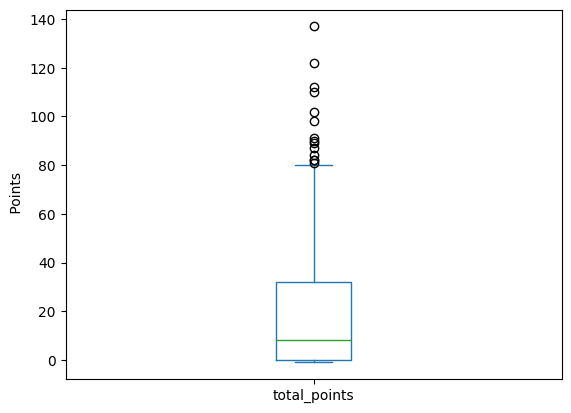

In [19]:
#BoxPlot--Total Points

Data["total_points"].plot(kind="box")
plt.ylabel(" Points")
plt.show()

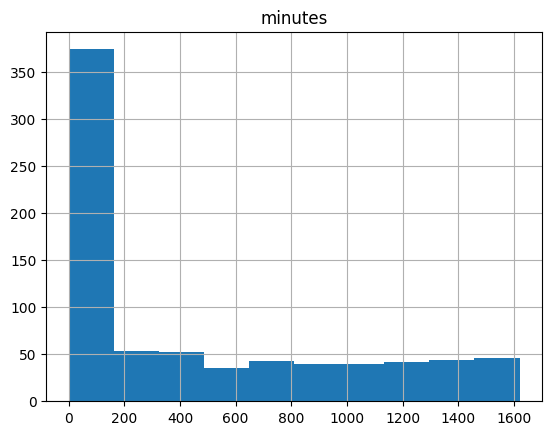

In [20]:
Data[['minutes']].hist()
plt.show()

In [21]:
Data.head()

,position,web_name,team,goals_scored,assists,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements,expected_goal_involvements_per_90,minutes,...,influence_rank,creativity,creativity_rank,points_per_game,points_per_game_rank,form,form_rank,bonus,bps,total_points
0,FWD,Balogun,Arsenal,0,0,0.00,0.00,0.00,0.00,0,...,623,0.0,612,0.0,635,0.0,564,0,0,0
1,DEF,Cédric,Arsenal,0,0,0.00,0.00,0.00,0.00,0,...,487,0.0,467,0.0,499,0.0,404,0,0,0
2,MID,M.Elneny,Arsenal,0,1,0.00,0.00,0.00,0.00,1,...,473,0.5,443,4.0,55,0.0,548,0,12,4
3,MID,Fábio Vieira,Arsenal,1,3,0.46,0.13,1.55,0.59,236,...,318,63.6,253,2.6,209,0.0,738,0,62,21
4,DEF,Gabriel,Arsenal,1,0,0.07,0.02,1.15,0.09,1284,...,110,59.0,269,3.5,100,4.5,34,4,259,56


In [22]:
#Filter out players who dont play 500 mins
Data.sort_values(by="minutes",inplace=True)
count=0
for index,row in Data.iterrows():
  if row["minutes"]<500:
    count+=1
    continue
  else:
    break
print(count)


481


In [23]:
Data_500mins=Data[481:]

In [24]:
Data_500mins.head(20)

,position,web_name,team,goals_scored,assists,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements,expected_goal_involvements_per_90,minutes,...,influence_rank,creativity,creativity_rank,points_per_game,points_per_game_rank,form,form_rank,bonus,bps,total_points
537,DEF,Botman,Newcastle,1,1,0.06,0.08,0.75,0.14,505,...,229,37.0,319,4.6,27,0.4,346,4,143,32
141,MID,Ghoddos,Brentford,1,0,0.04,0.11,0.83,0.15,511,...,288,106.0,171,1.5,350,1.8,190,0,78,18
571,MID,Miley,Newcastle,1,1,0.14,0.13,1.55,0.27,515,...,285,83.0,217,3.1,128,2.8,118,1,116,22
180,MID,Baleba,Brighton,0,0,0.07,0.01,0.47,0.08,519,...,299,68.9,240,1.1,392,0.8,297,0,71,12
165,MID,Milner,Brighton,0,1,0.01,0.16,0.96,0.17,521,...,291,148.6,129,1.4,360,1.2,251,0,92,15
753,MID,Sarabia,Wolves,1,4,0.21,0.43,3.76,0.64,527,...,193,350.4,32,3.5,97,3.2,94,4,141,39
365,DEF,Tete,Fulham,1,0,0.13,0.05,1.01,0.18,530,...,255,62.4,259,2.7,185,1.2,246,0,99,19
411,MID,Gravenberch,Liverpool,0,0,0.23,0.09,1.87,0.32,530,...,325,99.0,185,1.5,353,1.6,212,0,68,19
410,MID,Endo,Liverpool,1,0,0.03,0.05,0.49,0.08,533,...,296,40.4,312,1.6,342,2.4,143,0,85,21
175,DEF,Webster,Brighton,0,0,0.05,0.02,0.42,0.07,540,...,284,26.6,346,0.8,474,0.0,519,0,89,5


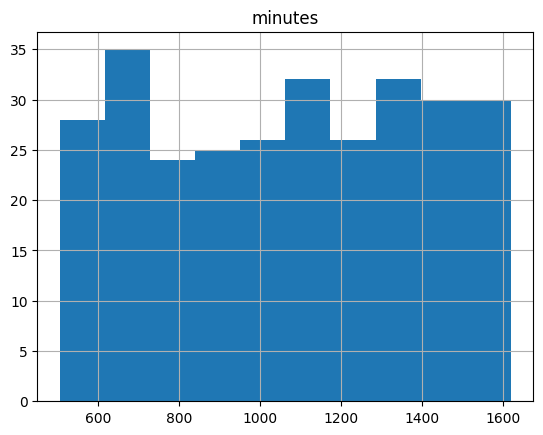

In [25]:
Data_500mins[['minutes']].hist()
plt.show()
#Much better distribution

In [26]:
Data_500mins.shape

(288, 25)

In [27]:
print(Data_500mins.groupby('position').size())

position
DEF    112
FWD     34
GKP     21
MID    121
dtype: int64


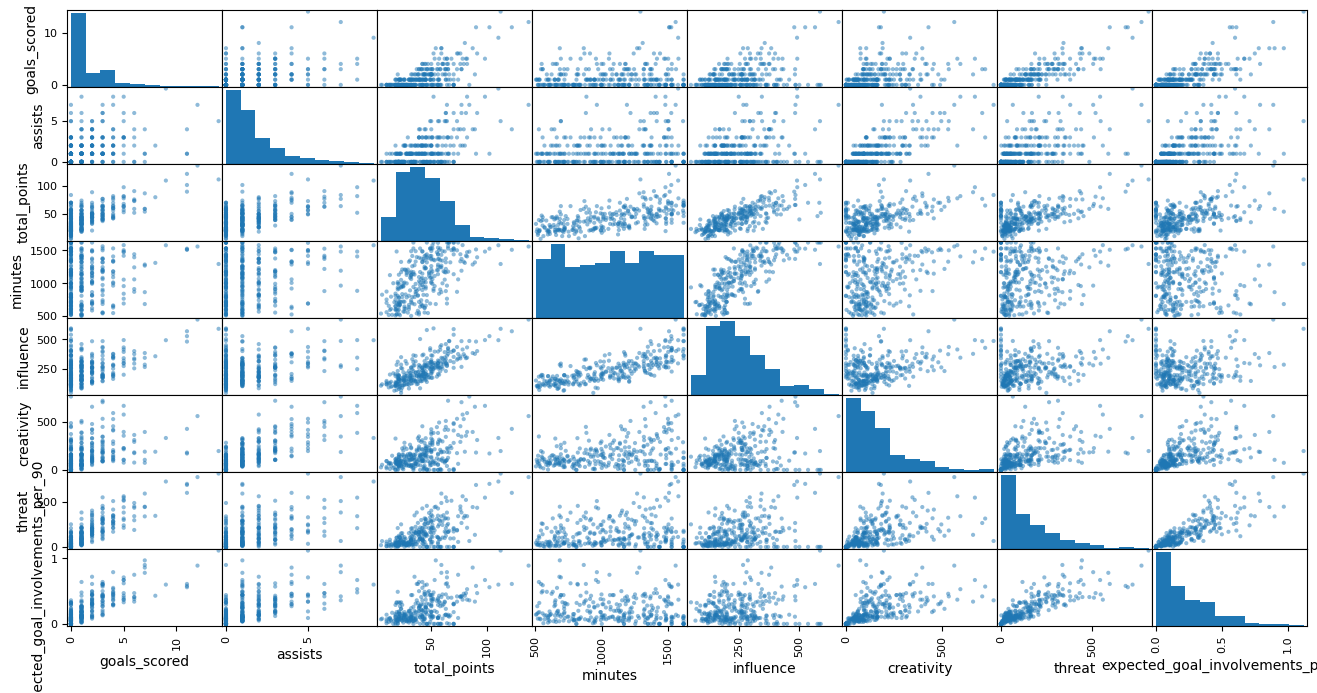

In [30]:
#Scatter Matrix
scatter_matrix(Data_500mins[['goals_scored','assists',"total_points","minutes","influence",'creativity','threat','expected_goal_involvements_per_90']],figsize=(16,8))
plt.show()
#Relation of x axis variables with y- axis variable
#Which criteria gives us a linear relation /Straight line

Which one produces the best straight line (threat - expected goal involvement)

In [31]:
FPL=Data_500mins.copy()

In [32]:
#Splitting Data
Array= FPL.values
X =Array[:,3:] # 3rd col er age baki shob dropped
Y=Array[:,0] # Position output varaible so 3rd col
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)


In [33]:
#Algorithms
Models=[LogisticRegression(solver='liblinear',multi_class='ovr'),SVC(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB()]
names=["LogR","SVC","RFC","DTC","KNN","GNB"]

In [34]:
#Stratified K fold ensure equal class distribution in all the folds
results = []
for i in range(len(Models)):
    model=Models[i]
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy',error_score='raise')
    results.append(cv_results)
    print('%s: %f (%f)' % (names[i], cv_results.mean(), cv_results.std()))

LogR: 0.834783 (0.063900)
SVC: 0.747826 (0.057680)
RFC: 0.786957 (0.036116)
DTC: 0.708696 (0.087065)
KNN: 0.726087 (0.087065)
GNB: 0.756522 (0.048415)


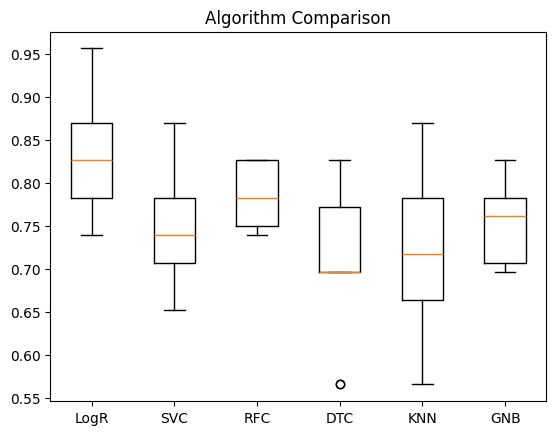

In [73]:
#Compare Algorithms
plt.boxplot(results, labels=names )
plt.title('Algorithm Comparison')
plt.show()

Ranking the medians we get LogR, Random forest Classifier , GNB , SVC , KNN and then Decision Tree



Model -1


In [203]:
model_1=LogisticRegression(solver='liblinear',multi_class='ovr',random_state=1)
model_1.fit(X_train,Y_train)
predictions=model_1.predict(X_test)

In [204]:
print(accuracy_score(Y_test,predictions))

print(confusion_matrix(Y_test,predictions))

print(classification_report(Y_test,predictions))

0.7758620689655172
[[20  0  0  2]
 [ 0  5  0  5]
 [ 0  0  4  0]
 [ 3  3  0 16]]
              precision    recall  f1-score   support

         DEF       0.87      0.91      0.89        22
         FWD       0.62      0.50      0.56        10
         GKP       1.00      1.00      1.00         4
         MID       0.70      0.73      0.71        22

    accuracy                           0.78        58
   macro avg       0.80      0.78      0.79        58
weighted avg       0.77      0.78      0.77        58



In [192]:
#Importance of each feature in the model
Coeffecient=model_1.coef_[0]
print(Coeffecient)


[-6.63176160e-01  5.55096888e-01 -2.75999345e-01 -2.15540116e-01
 -3.46474457e-01 -4.91539461e-01 -2.91712840e-03  7.07895480e-01
  4.28267254e-01 -1.84031512e-02 -2.19330053e-02 -1.58028766e-02
  2.13875640e-03 -1.74711829e-02 -1.50967421e-03  1.61147250e+00
  1.00788176e-02  3.03401142e-01  7.62994818e-04  4.21231368e-01
  9.22375120e-02 -3.02910476e-01]


In [76]:
Parameters=Data_500mins.columns[3:]
for serial,param in enumerate(Parameters):
  print(f"{serial} : {param}")

0 : goals_scored
1 : assists
2 : expected_goals_per_90
3 : expected_assists_per_90
4 : expected_goal_involvements
5 : expected_goal_involvements_per_90
6 : minutes
7 : starts_per_90
8 : goals_conceded_per_90
9 : threat
10 : threat_rank
11 : influence
12 : influence_rank
13 : creativity
14 : creativity_rank
15 : points_per_game
16 : points_per_game_rank
17 : form
18 : form_rank
19 : bonus
20 : bps
21 : total_points


In [39]:
for i,j in enumerate(Coeffecient):
  print(f"Feature {i} : {j}")

Feature 0 : -0.6631761595382799
Feature 1 : 0.5550968877473811
Feature 2 : -0.2759993450490094
Feature 3 : -0.21554011607428497
Feature 4 : -0.34647445659738463
Feature 5 : -0.49153946112329083
Feature 6 : -0.0029171284014220004
Feature 7 : 0.7078954795288908
Feature 8 : 0.4282672540082403
Feature 9 : -0.018403151205646114
Feature 10 : -0.021933005343383903
Feature 11 : -0.015802876630690476
Feature 12 : 0.0021387564023821145
Feature 13 : -0.01747118291780951
Feature 14 : -0.0015096742066030362
Feature 15 : 1.6114724961628717
Feature 16 : 0.01007881759328363
Feature 17 : 0.3034011423331506
Feature 18 : 0.0007629948182046077
Feature 19 : 0.4212313679984512
Feature 20 : 0.09223751204098338
Feature 21 : -0.30291047631957274


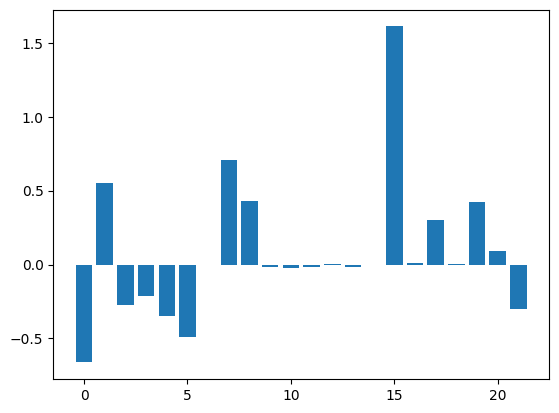

In [40]:
plt.bar([x for x in range(len(Coeffecient))],Coeffecient)
plt.show()

So the top 3 most important features are


1. Points per game

2. starts per 90

3. Assists

Model -2


In [224]:
model=RandomForestClassifier(random_state=1)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [225]:
print(accuracy_score(Y_test,predictions))

print(confusion_matrix(Y_test,predictions))

print(classification_report(Y_test,predictions))

0.7931034482758621
[[21  0  0  1]
 [ 0  4  0  6]
 [ 0  0  4  0]
 [ 5  0  0 17]]
              precision    recall  f1-score   support

         DEF       0.81      0.95      0.88        22
         FWD       1.00      0.40      0.57        10
         GKP       1.00      1.00      1.00         4
         MID       0.71      0.77      0.74        22

    accuracy                           0.79        58
   macro avg       0.88      0.78      0.80        58
weighted avg       0.82      0.79      0.78        58



Model -3

In [45]:
model=GaussianNB()
model.fit(X_train,Y_train)
predictions=model.predict(X_test)

In [46]:
print(accuracy_score(Y_test,predictions))

print(confusion_matrix(Y_test,predictions))

print(classification_report(Y_test,predictions))

0.6724137931034483
[[18  0  0  4]
 [ 1  5  0  4]
 [ 0  0  4  0]
 [ 9  1  0 12]]
              precision    recall  f1-score   support

         DEF       0.64      0.82      0.72        22
         FWD       0.83      0.50      0.62        10
         GKP       1.00      1.00      1.00         4
         MID       0.60      0.55      0.57        22

    accuracy                           0.67        58
   macro avg       0.77      0.72      0.73        58
weighted avg       0.68      0.67      0.67        58



In [69]:
clf=DecisionTreeClassifier(random_state=1)
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)

In [88]:
Top_Features = pd.DataFrame({'Feature':Data_500mins.columns[3:],'Importance':(clf.feature_importances_)})
Top_Features

,Feature,Importance
0,goals_scored,0.032766
1,assists,0.000000
2,expected_goals_per_90,0.035565
3,expected_assists_per_90,0.000000
4,expected_goal_involvements,0.000000
5,expected_goal_involvements_per_90,0.251347
6,minutes,0.018299
7,starts_per_90,0.035558
8,goals_conceded_per_90,0.050351
9,threat,0.012129


xGA/90 , threat ,creativity stands out in influencing the 'position' metric

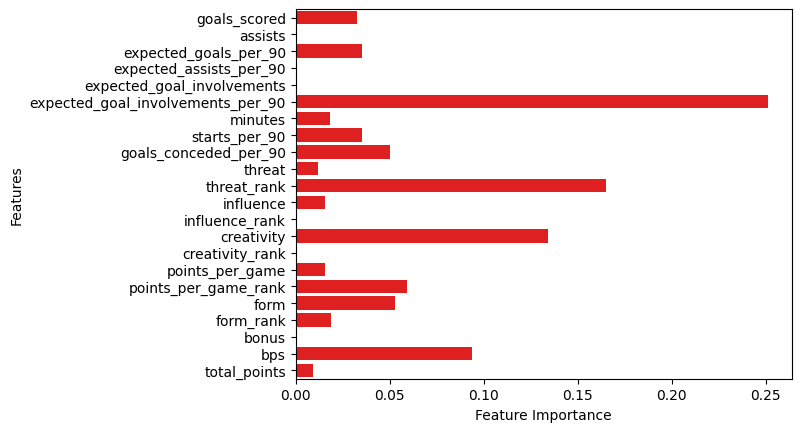

In [87]:
p=sns.barplot(x="Importance",y="Feature",data=Top_Features,color='red')
p.set(xlabel="Feature Importance",ylabel="Features")
plt.show()


Real Time Data

In [166]:
#Real_Time Data
Data_2025="https://fantasy.premierleague.com/api/bootstrap-static/"
req=requests.get(Data_2025)
json=req.json()
json.keys()

dict_keys(['chips', 'events', 'game_settings', 'game_config', 'phases', 'teams', 'total_players', 'element_stats', 'element_types', 'elements'])

In [167]:
Data25_elements = pd.DataFrame(json['elements'])
Data25_element_types = pd.DataFrame(json['element_types'])
Data25_teams = pd.DataFrame(json['teams'])


In [168]:
Data25_elements.columns

Index(['can_transact', 'can_select', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'code', 'cost_change_event',
       'cost_change_event_fall', 'cost_change_start', 'cost_change_start_fall',
       'dreamteam_count', 'element_type', 'ep_next', 'ep_this', 'event_points',
       'first_name', 'form', 'id', 'in_dreamteam', 'news', 'news_added',
       'now_cost', 'photo', 'points_per_game', 'removed', 'second_name',
       'selected_by_percent', 'special', 'squad_number', 'status', 'team',
       'team_code', 'total_points', 'transfers_in', 'transfers_in_event',
       'transfers_out', 'transfers_out_event', 'value_form', 'value_season',
       'web_name', 'region', 'team_join_date', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'starts', 'expected_goals', 

In [169]:
Data25_elements

,can_transact,can_select,chance_of_playing_next_round,chance_of_playing_this_round,code,cost_change_event,cost_change_event_fall,cost_change_start,cost_change_start_fall,dreamteam_count,...,now_cost_rank,now_cost_rank_type,form_rank,form_rank_type,points_per_game_rank,points_per_game_rank_type,selected_rank,selected_rank_type,starts_per_90,clean_sheets_per_90
0,True,False,0.0,0.0,438098,0,0,-1,1,0,...,133,80,710,317,724,323,661,285,0.00,0.00
1,True,True,0.0,0.0,205651,0,0,-3,3,2,...,36,18,88,12,198,24,139,21,0.90,0.30
2,True,True,100.0,100.0,226597,0,0,4,-4,2,...,49,3,143,41,44,4,9,3,1.05,0.31
3,True,True,100.0,100.0,219847,0,0,-2,2,1,...,13,5,101,14,41,11,44,11,1.03,0.33
4,True,False,0.0,0.0,463748,0,0,0,0,0,...,647,58,452,54,547,63,579,69,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,True,True,NaN,NaN,463212,0,0,0,0,0,...,117,72,358,176,483,230,573,231,0.38,0.00
730,True,True,NaN,NaN,517179,0,0,-1,1,0,...,729,246,419,145,404,132,216,84,0.00,0.00
731,True,True,NaN,NaN,596054,0,0,0,0,0,...,469,295,635,267,689,301,629,267,0.00,0.00
732,True,True,NaN,NaN,613467,0,0,0,0,0,...,696,224,495,199,586,226,683,236,0.00,0.00


In [170]:
Data25_elements[['id', 'web_name', 'team', 'element_type']].head()

,id,web_name,team,element_type
0,1,Fábio Vieira,1,3
1,2,G.Jesus,1,4
2,3,Gabriel,1,2
3,4,Havertz,1,4
4,5,Hein,1,1


In [171]:
Data25_teams.head(20)

,code,draw,form,id,loss,name,played,points,position,short_name,...,team_division,unavailable,win,strength_overall_home,strength_overall_away,strength_attack_home,strength_attack_away,strength_defence_home,strength_defence_away,pulse_id
0,3,0,None,1,0,Arsenal,0,0,0,ARS,...,None,False,0,1250,1360,1260,1370,1240,1350,1
1,7,0,None,2,0,Aston Villa,0,0,0,AVL,...,None,False,0,1110,1240,1080,1160,1140,1320,2
2,91,0,None,3,0,Bournemouth,0,0,0,BOU,...,None,False,0,1140,1175,1080,1140,1190,1210,127
3,94,0,None,4,0,Brentford,0,0,0,BRE,...,None,False,0,1080,1225,1070,1100,1090,1350,130
4,36,0,None,5,0,Brighton,0,0,0,BHA,...,None,False,0,1110,1150,1080,1100,1140,1200,131
5,8,0,None,6,0,Chelsea,0,0,0,CHE,...,None,False,0,1255,1255,1150,1150,1360,1360,4
6,31,0,None,7,0,Crystal Palace,0,0,0,CRY,...,None,False,0,1120,1125,1130,1140,1110,1110,6
7,11,0,None,8,0,Everton,0,0,0,EVE,...,None,False,0,1095,1125,1130,1150,1060,1100,7
8,54,0,None,9,0,Fulham,0,0,0,FUL,...,None,False,0,1125,1140,1140,1140,1110,1160,34
9,40,0,None,10,0,Ipswich,0,0,0,IPS,...,None,False,0,1075,1075,1070,1070,1080,1080,8


In [172]:
Data25_elements['team'] = Data25_elements['team'].replace(1, 'Arsenal')
Data25_elements['team'] = Data25_elements['team'].replace(2, 'Aston Villa')
Data25_elements['team'] = Data25_elements['team'].replace(3, 'Bournemouth')
Data25_elements['team'] = Data25_elements['team'].replace(4, 'Brentford')
Data25_elements['team'] = Data25_elements['team'].replace(5, 'Brighton')
Data25_elements['team'] = Data25_elements['team'].replace(6, 'Chelsea')
Data25_elements['team'] = Data25_elements['team'].replace(7, 'Crystal Palace')
Data25_elements['team'] = Data25_elements['team'].replace(8, 'Everton')
Data25_elements['team'] = Data25_elements['team'].replace(9, 'Fulham')
Data25_elements['team'] = Data25_elements['team'].replace(10, 'Ipswich')
Data25_elements['team'] = Data25_elements['team'].replace(11, 'Leicester')
Data25_elements['team'] = Data25_elements['team'].replace(12, 'Liverpool')
Data25_elements['team'] = Data25_elements['team'].replace(13, 'Man City')
Data25_elements['team'] = Data25_elements['team'].replace(14, 'Man Utd')
Data25_elements['team'] = Data25_elements['team'].replace(15, 'Newcastle')
Data25_elements['team'] = Data25_elements['team'].replace(16, "Nott'm Forest")
Data25_elements['team'] = Data25_elements['team'].replace(17, 'Southampton')
Data25_elements['team'] = Data25_elements['team'].replace(18, 'Spurs')
Data25_elements['team'] = Data25_elements['team'].replace(19, 'West Ham')
Data25_elements['team'] = Data25_elements['team'].replace(20, 'Wolves')



In [173]:
Data25_elements[['id', 'web_name', 'team', 'element_type']].head(40)

,id,web_name,team,element_type
0,1,Fábio Vieira,Arsenal,3
1,2,G.Jesus,Arsenal,4
2,3,Gabriel,Arsenal,2
3,4,Havertz,Arsenal,4
4,5,Hein,Arsenal,1
5,6,J.Timber,Arsenal,2
6,7,Jorginho,Arsenal,3
7,8,Kiwior,Arsenal,2
8,9,Martinelli,Arsenal,3
9,12,Nwaneri,Arsenal,3


In [174]:
Data25_elements.rename(columns={"element_type": "position"}, inplace=True)
Data25_elements[['id', 'web_name', 'team', 'position']].head()

,id,web_name,team,position
0,1,Fábio Vieira,Arsenal,3
1,2,G.Jesus,Arsenal,4
2,3,Gabriel,Arsenal,2
3,4,Havertz,Arsenal,4
4,5,Hein,Arsenal,1


In [175]:
Data25_element_types[['id', 'singular_name_short']].head()

,id,singular_name_short
0,1,GKP
1,2,DEF
2,3,MID
3,4,FWD


In [176]:
Data25_elements['position'] = Data25_elements['position'].replace(1, 'GKP')
Data25_elements['position'] = Data25_elements['position'].replace(2, 'DEF')
Data25_elements['position'] = Data25_elements['position'].replace(3, 'MID')
Data25_elements['position'] = Data25_elements['position'].replace(4, 'FWD')
Data25_elements[['id', 'web_name', 'team', 'position']].head()

,id,web_name,team,position
0,1,Fábio Vieira,Arsenal,MID
1,2,G.Jesus,Arsenal,FWD
2,3,Gabriel,Arsenal,DEF
3,4,Havertz,Arsenal,FWD
4,5,Hein,Arsenal,GKP


In [177]:
FPL_Data_2025=Data25_elements[['position','web_name','team','goals_scored','assists','expected_goals_per_90','expected_assists_per_90','expected_goal_involvements','expected_goal_involvements_per_90','minutes','starts_per_90','goals_conceded_per_90','threat','threat_rank','influence','influence_rank','creativity','creativity_rank','points_per_game' ,'points_per_game_rank','form','form_rank','bonus','bps','total_points']]
FPL_Data_2025


,position,web_name,team,goals_scored,assists,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements,expected_goal_involvements_per_90,minutes,...,influence_rank,creativity,creativity_rank,points_per_game,points_per_game_rank,form,form_rank,bonus,bps,total_points
0,MID,Fábio Vieira,Arsenal,0,0,0.00,0.00,0.00,0.00,0,...,723,0.0,723,0.0,724,0.0,710,0,0,0
1,FWD,G.Jesus,Arsenal,3,2,0.46,0.08,3.57,0.54,600,...,258,119.5,201,2.5,198,3.2,88,6,152,42
2,DEF,Gabriel,Arsenal,3,2,0.13,0.05,3.45,0.18,1718,...,42,156.5,161,4.2,44,2.4,143,7,315,85
3,FWD,Havertz,Arsenal,8,2,0.45,0.07,9.75,0.52,1660,...,65,240.9,104,4.3,41,3.0,101,11,302,82
4,GKP,Hein,Arsenal,0,0,0.00,0.00,0.00,0.00,0,...,540,0.0,521,0.0,547,0.0,452,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
729,MID,Forbs,Wolves,0,0,0.06,0.04,0.25,0.10,235,...,413,24.1,354,0.9,483,0.4,358,0,32,8
730,DEF,Pond,Wolves,0,0,0.00,0.00,0.00,0.00,1,...,512,0.0,489,1.0,404,0.0,419,0,3,1
731,MID,Edozie,Wolves,0,0,0.00,0.00,0.00,0.00,0,...,683,0.0,679,0.0,689,0.0,635,0,0,0
732,DEF,Okoduwa,Wolves,0,0,0.00,0.00,0.00,0.00,0,...,578,0.0,560,0.0,586,0.0,495,0,0,0


In [178]:
#Filter out players who dont play 300 mins
FPL_Data_2025.sort_values(by="minutes",inplace=True)
count=0
for index,row in FPL_Data_2025.iterrows():
  if row["minutes"]<300:
    count+=1
    continue
  else:
    break
print(count)

372


In [179]:
FPL2025=FPL_Data_2025[372:]
FPL2025

,position,web_name,team,goals_scored,assists,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements,expected_goal_involvements_per_90,minutes,...,influence_rank,creativity,creativity_rank,points_per_game,points_per_game_rank,form,form_rank,bonus,bps,total_points
580,MID,Fraser,Southampton,0,0,0.01,0.03,0.12,0.04,301,...,397,26.5,344,0.9,479,0.0,651,0,28,6
337,MID,Broadhead,Ipswich,0,0,0.21,0.23,1.46,0.44,302,...,386,56.9,288,1.4,360,1.4,224,0,50,10
184,MID,Gruda,Brighton,0,0,0.08,0.14,0.76,0.22,317,...,375,115.8,204,1.3,376,1.0,276,0,43,13
594,MID,Lallana,Southampton,0,2,0.04,0.13,0.63,0.17,322,...,350,81.9,247,1.3,373,0.6,323,1,67,14
7,DEF,Kiwior,Arsenal,0,0,0.00,0.01,0.03,0.01,323,...,377,13.7,388,1.6,326,0.0,659,0,39,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,DEF,Robinson,Fulham,0,9,0.03,0.13,3.51,0.16,1980,...,7,518.1,25,3.7,73,4.2,50,7,359,82
249,GKP,Henderson,Crystal Palace,0,0,0.00,0.00,0.02,0.00,1980,...,28,10.0,408,3.6,76,4.8,36,4,270,79
342,DEF,Davis,Ipswich,1,2,0.03,0.17,4.37,0.20,1980,...,97,603.3,11,2.1,245,1.2,239,5,177,47
115,DEF,Collins,Brentford,2,4,0.10,0.05,3.21,0.15,1980,...,9,86.0,241,2.9,134,3.0,92,1,289,64


In [180]:
FPL2025.dtypes

,0
position,object
web_name,object
team,object
goals_scored,int64
assists,int64
expected_goals_per_90,float64
expected_assists_per_90,float64
expected_goal_involvements,object
expected_goal_involvements_per_90,float64
minutes,int64


In [181]:
FPL2025[["expected_goal_involvements","threat","influence","creativity","points_per_game","form"]]=FPL2025[["expected_goal_involvements","threat","influence","creativity","points_per_game","form"]].apply(pd.to_numeric)


In [182]:
FPL2025.dtypes

,0
position,object
web_name,object
team,object
goals_scored,int64
assists,int64
expected_goals_per_90,float64
expected_assists_per_90,float64
expected_goal_involvements,float64
expected_goal_involvements_per_90,float64
minutes,int64


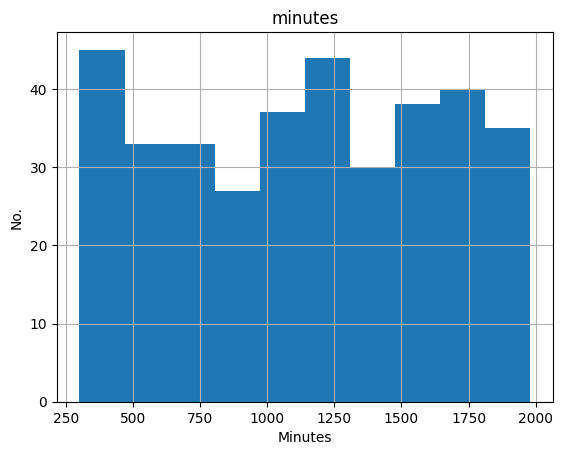

In [186]:
FPL2025[['minutes']].hist()
plt.xlabel("Minutes")
plt.ylabel("No.")
plt.show()

In [187]:
FPL2025.shape

(362, 25)

In [220]:
Array2= FPL2025.values
new_input_X=Array2[:,3:]
print(new_input_X)
Original=Array2[:,0] # Original position of the player
predictions=model_1.predict(new_input_X)
print(new_input_X)
print(new_input_X,predictions)


[[0 0 0.01 ... 0 28 6]
 [0 0 0.21 ... 0 50 10]
 [0 0 0.08 ... 0 43 13]
 ...
 [1 2 0.03 ... 5 177 47]
 [2 4 0.1 ... 1 289 64]
 [0 0 0.0 ... 5 279 76]]
[[0 0 0.01 ... 0 28 6]
 [0 0 0.21 ... 0 50 10]
 [0 0 0.08 ... 0 43 13]
 ...
 [1 2 0.03 ... 5 177 47]
 [2 4 0.1 ... 1 289 64]
 [0 0 0.0 ... 5 279 76]]
[[0 0 0.01 ... 0 28 6]
 [0 0 0.21 ... 0 50 10]
 [0 0 0.08 ... 0 43 13]
 ...
 [1 2 0.03 ... 5 177 47]
 [2 4 0.1 ... 1 289 64]
 [0 0 0.0 ... 5 279 76]] ['DEF' 'DEF' 'MID' 'DEF' 'GKP' 'MID' 'FWD' 'DEF' 'MID' 'MID' 'MID' 'MID'
 'MID' 'FWD' 'GKP' 'DEF' 'MID' 'MID' 'DEF' 'MID' 'MID' 'DEF' 'DEF' 'MID'
 'FWD' 'MID' 'MID' 'GKP' 'DEF' 'MID' 'MID' 'MID' 'FWD' 'DEF' 'DEF' 'DEF'
 'MID' 'DEF' 'DEF' 'GKP' 'GKP' 'MID' 'DEF' 'DEF' 'DEF' 'DEF' 'MID' 'DEF'
 'MID' 'DEF' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'DEF' 'DEF' 'MID'
 'MID' 'MID' 'FWD' 'DEF' 'FWD' 'FWD' 'DEF' 'MID' 'DEF' 'MID' 'MID' 'FWD'
 'DEF' 'FWD' 'MID' 'GKP' 'GKP' 'GKP' 'MID' 'DEF' 'DEF' 'DEF' 'MID' 'MID'
 'MID' 'MID' 'MID' 'MID' 'MID' 'GKP' 'G

In [221]:
print(accuracy_score(Original,predictions))
print(confusion_matrix(Original,predictions))
print(classification_report(Original,predictions))

0.5165745856353591
[[ 19   0   2 107]
 [  1  31   0   1]
 [  0   0  28   2]
 [ 48  14   0 109]]
              precision    recall  f1-score   support

         DEF       0.28      0.15      0.19       128
         FWD       0.69      0.94      0.79        33
         GKP       0.93      0.93      0.93        30
         MID       0.50      0.64      0.56       171

    accuracy                           0.52       362
   macro avg       0.60      0.66      0.62       362
weighted avg       0.47      0.52      0.48       362



In [222]:
FPL2025['predicted'] = predictions
FPL2025=FPL2025[['predicted','position','web_name','team','points_per_game']]
FPL2025=FPL2025.sort_values(by="points_per_game",ascending=False)
FPL2025.head(40)

,predicted,position,web_name,team,points_per_game
423,FWD,MID,M.Salah,Liverpool,10.2
226,MID,MID,Palmer,Chelsea,7.5
519,FWD,FWD,Isak,Newcastle,6.8
13,FWD,MID,Saka,Arsenal,6.7
126,MID,MID,Mbeumo,Brentford,6.4
567,FWD,FWD,Wood,Nott'm Forest,6.1
451,FWD,FWD,Haaland,Man City,6.0
515,GKP,GKP,Dúbravka,Newcastle,5.6
701,FWD,FWD,Cunha,Wolves,5.4
137,FWD,FWD,Wissa,Brentford,5.2
